# Dose Response Function of the Adaptive Voter Model

For this notebook the avm needs to be simulated 10 times and the exposure needs to be calculated for each run. This can be done with the following scripts:
* Model run: data/Synthetisch/avm_model_5k/run.sh
* Exposure calc: run_avm_model.sh

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
#from sensible_raw.loaders import loader
from world_viewer.cns_world import CNSWorld
from world_viewer.synthetic_world import SyntheticWorld
from world_viewer.glasses import Glasses
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm

#import dask.dataframe as dd
import time
from sklearn.utils import shuffle
from matplotlib.figure import figaspect


/home/kitzmann/Dropbox/PIK/Project: Jakob's thesis paper/master_thesis/world_viewer/cns_world.py:19: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  CNS_TIME_BEGIN = pd.Timestamp(pd.datetime(2013, 9, 2)) # first timestamp
/home/kitzmann/Dropbox/PIK/Project: Jakob's thesis paper/master_thesis/world_viewer/cns_world.py:20: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  CNS_TIME_END = pd.Timestamp(pd.datetime(2014, 12, 31)) # last timestamp
/home/kitzmann/Dropbox/PIK/Project: Jakob's thesis paper/master_thesis/world_viewer/cns_world.py:26: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  def __init__(self, path='', start=pd.datetime(2013, 9, 2), end=pd.datetime(2014, 12, 31)):


In [4]:
# set analysis parameters
analysis = 'expo_nmb'
opinion_type = "op_synthetic"
binning = True
n_bins = 30
save_plots = False
show_plot = True

phi = 0.0
steps = 89
run = 1


In [5]:
# load data
syn = SyntheticWorld(path="data/Synthetisch/avm_final_5k", run=1, number_of_nodes=851)
syn_glasses = Glasses(syn)

In [19]:
# load data from multiple model runs
def load_data(runs, phi, analysis = "expo_nmb"):
    data_all = []
    expo_agg_all = []
    for run in runs:
        if phi == 0.0:
            steps = 89
        else:
            steps = 255
        syn = SyntheticWorld(path="data/Synthetisch/avm_final_5k", run=1, number_of_nodes=851)
        syn.load_world(phi=phi, cc=False, n_op=2 ,read_cached=False, tc = True, steps=steps)
        syn_glasses = Glasses(syn)
        
        #exposure = pd.read_pickle(f"tmp/final/avm_final/exposure_phi{phi}_run{run}_5k.pkl")
        exposure = pd.read_pickle(f"tmp/ShuffledAVM/exposure_fitness_7_1_shuffled_time_edges_complete_phi{phi}_{run}.pkl")
        syn.a_ij = pd.read_pickle(f"tmp/ShuffledAVM/a_ij_shuffled_time_complete_phi{phi}_{run}.pkl")
        if analysis == "expo_nmb":
            exposure.rename(columns={"exposure":"exposure_old", "n_influencer_summed":"exposure"},inplace=True)
        data, expo_agg = syn_glasses.opinion_change_per_exposure(exposure, opinion_type, opinion_change_time = 1)
        data_all += [data]
        expo_agg_all += [expo_agg]
    return pd.concat(data_all), pd.concat(expo_agg_all)

In [20]:
data, expo_agg = load_data(runs = range(1,11), phi = 0.0)
data6, expo_agg6 = load_data(runs = range(1,11), phi = 0.6)

Load World: SYN_phi=0.0_CC=False_N=2_TC=True_run=1 from adaptive_voter_model_phi0.0_nopinions2_steps89_run1_tc
Numer of time steps is: 90
read edges
read traits
INFO: Calc op-change
Load World: SYN_phi=0.0_CC=False_N=2_TC=True_run=1 from adaptive_voter_model_phi0.0_nopinions2_steps89_run1_tc
Numer of time steps is: 90
read edges
read traits
INFO: Calc op-change
Load World: SYN_phi=0.0_CC=False_N=2_TC=True_run=1 from adaptive_voter_model_phi0.0_nopinions2_steps89_run1_tc
Numer of time steps is: 90
read edges
read traits
INFO: Calc op-change
Load World: SYN_phi=0.0_CC=False_N=2_TC=True_run=1 from adaptive_voter_model_phi0.0_nopinions2_steps89_run1_tc
Numer of time steps is: 90
read edges
read traits
INFO: Calc op-change
Load World: SYN_phi=0.0_CC=False_N=2_TC=True_run=1 from adaptive_voter_model_phi0.0_nopinions2_steps89_run1_tc
Numer of time steps is: 90
read edges
read traits
INFO: Calc op-change
Load World: SYN_phi=0.0_CC=False_N=2_TC=True_run=1 from adaptive_voter_model_phi0.0_nopini

<IPython.core.display.Javascript object>


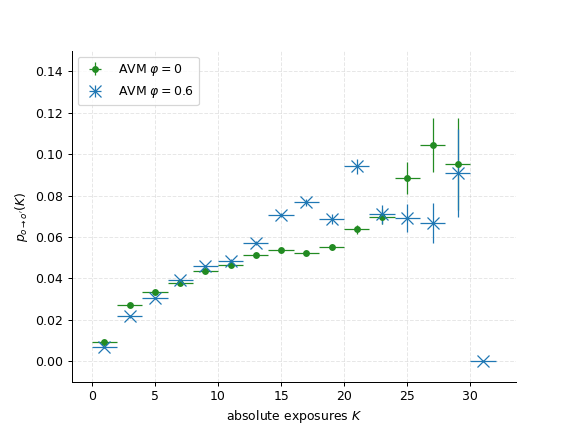

(<Figure size 640x480 with 1 Axes>,
 <ErrorbarContainer object of 3 artists>)

In [21]:
# plot drf for avm with absolute exposure (fig 3.1)
# see plot for relative exposure at the end of the notebook

syn_glasses.output_folder = ""
bin_width = 2
qbin=False
# plot
fig, ax, _ = syn_glasses.plot_opinion_change_per_exposure_number(data, "expo_nmb", \
                                    binning, n_bins=n_bins, bin_width=bin_width, save_plots=False, show_plot=show_plot, \
                                    label=r"AVM $\varphi = 0$", q_binning = qbin, loglog=False, step_plot=True, y_upper_lim=0.15, \
                                    color="forestgreen", suffix="",min_bin_size=30, marker = ".")
syn_glasses.plot_opinion_change_per_exposure_number(data6, "expo_nmb", \
                                    binning, n_bins=n_bins, bin_width=bin_width, save_plots=False, show_plot=show_plot, \
                                    label=r"AVM $\varphi = 0.6$", q_binning = qbin, loglog=False, step_plot=True, y_upper_lim=0.15, \
                                    color="tab:blue", suffix="",min_bin_size=30, fig=fig, ax = ax, marker = "x")
#fig.savefig("tmp/final/avm.pdf" , bbox_inches='tight')

In [7]:
# load copenhagen data in order to make a comparison plot
cns = CNSWorld()
cns.load_world(opinions = ['fitness'], read_cached = False, stop=False, write_pickle = False, continous_op=False)
cns_glasses = Glasses(cns)
cns_data = pd.read_pickle("tmp/final/spring_data.pkl")


Process opinion data for variable: fitness


<IPython.core.display.Javascript object>


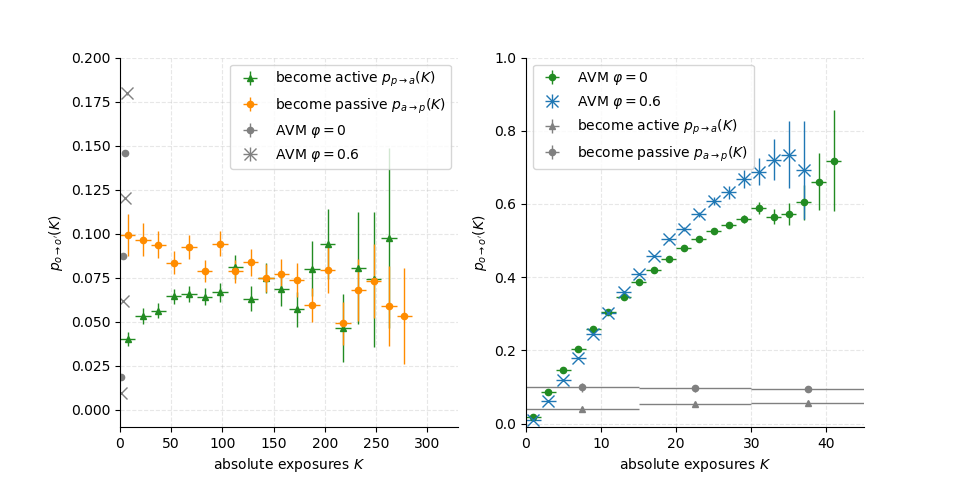

/home/lochnerpik@gmail.com/master/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


In [12]:
# comparison plot with copenhagen data (fig. 5.3)

x_max = 330
w, h = figaspect(0.5)
cns_data = cns_data[cns_data.exposure <= x_max]
fig,ax = plt.subplots(1,2, figsize=(w,h))

syn_glasses.output_folder = ""
bin_width = 2
qbin=False
# plot
syn_glasses.plot_opinion_change_per_exposure_number(data, "expo_nmb", \
                                    binning, n_bins=30, bin_width=bin_width, save_plots=False, show_plot=show_plot, \
                                    label=r"AVM $\varphi = 0$", q_binning = qbin, loglog=False, step_plot=True, y_lower_lim=-0.01, y_upper_lim=1, \
                                    color="forestgreen", suffix="",min_bin_size=30,  fig=fig, ax = ax[1],marker = ".",lable_outer=False)
syn_glasses.plot_opinion_change_per_exposure_number(data6, "expo_nmb", \
                                    binning, n_bins=30, bin_width=bin_width, save_plots=False, show_plot=show_plot, \
                                    label=r"AVM $\varphi = 0.6$", q_binning = qbin, loglog=False, step_plot=True, y_lower_lim=-0.01, y_upper_lim=1, \
                                    color="tab:blue", suffix="",min_bin_size=30, fig=fig, ax = ax[1], marker = "x",lable_outer=False)
cns_glasses.plot_opinion_change_per_exposure_number(cns_data[cns_data.op_fitness == True], "expo_nmb", binning, n_bins=n_bins, bin_width=15, \
            save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = 1, label=r"become active $p_{p \rightarrow a}(K)$", \
            q_binning = False, loglog=False, step_plot=True, color="gray", x_lim=45, fig=fig, ax = ax[1], lable_outer=False, marker="^", markersize=5)
cns_glasses.plot_opinion_change_per_exposure_number(cns_data[cns_data.op_fitness == False], "expo_nmb", binning, n_bins=n_bins, bin_width=15, \
            save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = 1, label=r"become passive $p_{a \rightarrow p}(K)$", \
            q_binning = False, loglog=False, step_plot=True, color="gray", x_lim=45, fig=fig, ax = ax[1], lable_outer=False, marker=".")


cns_glasses.plot_opinion_change_per_exposure_number(cns_data[cns_data.op_fitness == True], "expo_nmb", binning, n_bins=n_bins, bin_width=15, \
            save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = 0.2, label=r"become active $p_{p \rightarrow a}(K)$", \
            q_binning = False, loglog=False, step_plot=True, color="forestgreen", x_lim=x_max, fig=fig, ax = ax[0], lable_outer=False, marker="^", markersize=5)
cns_glasses.plot_opinion_change_per_exposure_number(cns_data[cns_data.op_fitness == False], "expo_nmb", binning, n_bins=n_bins, bin_width=15, \
            save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = 0.2, label=r"become passive $p_{a \rightarrow p}(K)$", \
            q_binning = False, loglog=False, step_plot=True, color="darkorange", x_lim=x_max, fig=fig, ax = ax[0], lable_outer=False, marker="." )
syn_glasses.plot_opinion_change_per_exposure_number(data, "expo_nmb", \
                                    binning, n_bins=30, bin_width=bin_width, save_plots=False, show_plot=show_plot, \
                                    label=r"AVM $\varphi = 0$", q_binning = qbin, loglog=False, step_plot=True, y_lower_lim=-0.01, y_upper_lim=0.2, \
                                    color="gray", suffix="",min_bin_size=30,  fig=fig, ax = ax[0],marker = ".", lable_outer=False)
syn_glasses.plot_opinion_change_per_exposure_number(data6, "expo_nmb", \
                                    binning, n_bins=30, bin_width=bin_width, save_plots=False, show_plot=show_plot, \
                                    label=r"AVM $\varphi = 0.6$", q_binning = qbin, loglog=False, step_plot=True, y_lower_lim=-0.01, y_upper_lim=0.2, \
                                    color="gray", suffix="",min_bin_size=30, fig=fig, ax = ax[0], marker = "x", lable_outer=False)

#ax[0].set_title("(a) Drf of the Adaptive Voter Model.", y=-0.21)
#ax[1].set_title("(b) Empirical drf.", y=-0.21)
ax[0].legend(loc="upper right")

fig.savefig("tmp/final/avm_vs_cns.pdf" , bbox_inches='tight')

In [5]:
# load data for drf of avm with relative exposure (fig 3.1)
data, expo_agg = load_data(runs = range(10), phi = 0.0, analysis="expo_frac")
data6, expo_agg6 = load_data(runs = range(10), phi = 0.6, analysis="expo_frac")

Load World: SYN_phi=0.0_CC=False_N=2_TC=True_run=0 from adaptive_voter_model_phi0.0_nopinions2_run0_tc
Numer of time steps is: 190
read edges
read traits
INFO: Calc op-change
Load World: SYN_phi=0.0_CC=False_N=2_TC=True_run=1 from adaptive_voter_model_phi0.0_nopinions2_run1_tc
Numer of time steps is: 501
read edges
read traits
INFO: Calc op-change
Load World: SYN_phi=0.0_CC=False_N=2_TC=True_run=2 from adaptive_voter_model_phi0.0_nopinions2_run2_tc
Numer of time steps is: 417
read edges
read traits
INFO: Calc op-change
Load World: SYN_phi=0.0_CC=False_N=2_TC=True_run=3 from adaptive_voter_model_phi0.0_nopinions2_run3_tc
Numer of time steps is: 501
read edges
read traits
INFO: Calc op-change
Load World: SYN_phi=0.0_CC=False_N=2_TC=True_run=4 from adaptive_voter_model_phi0.0_nopinions2_run4_tc
Numer of time steps is: 261
read edges
read traits
INFO: Calc op-change
Load World: SYN_phi=0.0_CC=False_N=2_TC=True_run=5 from adaptive_voter_model_phi0.0_nopinions2_run5_tc
Numer of time steps is

<IPython.core.display.Javascript object>


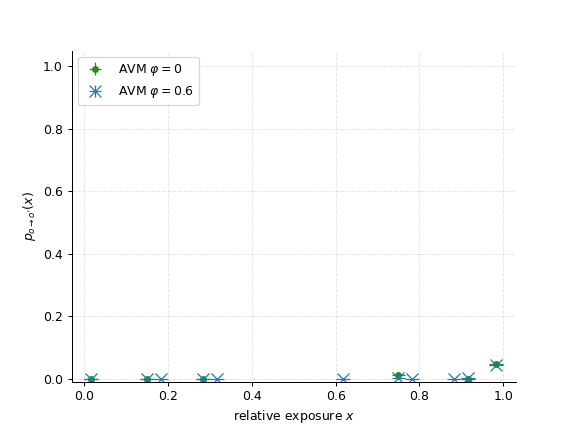

In [22]:
# plot of drf from avm with relative exposure (fig 3.1)

syn_glasses.output_folder = ""
bin_width = 2
qbin=False
# plot
fig, ax, _ = syn_glasses.plot_opinion_change_per_exposure_number(data, "expo_frac", \
                                    binning, n_bins=n_bins, bin_width=bin_width, save_plots=False, show_plot=show_plot, \
                                    label=r"AVM $\varphi = 0$", q_binning = qbin, loglog=False, step_plot=True, y_upper_lim=1.05, \
                                    color="forestgreen", suffix="",min_bin_size=30, marker = ".")
syn_glasses.plot_opinion_change_per_exposure_number(data6, "expo_frac", \
                                    binning, n_bins=n_bins, bin_width=bin_width, save_plots=False, show_plot=show_plot, \
                                    label=r"AVM $\varphi = 0.6$", q_binning = qbin, loglog=False, step_plot=True, y_upper_lim=1.05, \
                                    color="tab:blue", suffix="",min_bin_size=30, fig=fig, ax = ax, marker = "x")
fig.savefig("tmp/final/avm_rel.pdf" , bbox_inches='tight')